In [1]:
from dbase import *

In [12]:
vars(Subjects[28].jacobians[0])

{'avg': '/disco2/LEGACY_PAULA/ADNI_longitudinal_proc/S76_1/avgj_S76_r0_9287_t1_44504.nii.gz',
 'dCSFi1': 0.04709760979630295,
 'dCSFi2': 0.057717922154802315,
 'dabeta': 0.0,
 'dir': 'S76_1/',
 'dptau': 3.8999999999999986,
 'dt': 376,
 'dtau': 8.0,
 'dv': '/disco2/LEGACY_PAULA/ADNI_longitudinal_proc/S76_1/dv_S76_r0_9287_t1_44504.nii',
 'jb': '/home/miquel/ForMiquel/ADNI_longitudinal_proc_short/S76_1/jd_S76_r0_9287_t1_44504.nii',
 'label': 0,
 'log': '',
 'nii': '',
 'reference': <allmypy.Event at 0x7f429f5df400>,
 'rid': 76,
 'subject_id': '067_S_0076',
 'target': <allmypy.Event at 0x7f429f5df4a8>}

## list of images with preclinical conditions (A=1, dx='NL')


In [2]:
events_preclinical=[]
for i in Subjects:
    for j in range(0,len(i.events)):
        if i.events[j].A == 1 and i.events[j].dx == 'NL':
            events_preclinical.append(i.events[j].image_id)
print("list of preclinical image ids")            
print(events_preclinical)
print("total of preclinical images: ", len(events_preclinical))
            

list of preclinical image ids
['7071', '24618', '7302', '26073', '207222', '8120', '31331', '81038', '9324', '31825', '84908', '166800', '217232', '9882', '44702', '10126', '37456', '89359', '165499', '134856', '165521', '40538', '165858', '137805', '169829', '11033', '41856', '90493', '11335', '42804', '235735', '96553', '13550', '11645', '11567', '42948', '15717', '67802', '190412', '317533', '11888', '47591', '139971', '168410', '12313', '13722', '55275', '144446', '173732', '238627', '16274', '58624', '14146', '54338', '143381', '172501', '14524', '54067', '148275', '14861', '57065', '15270', '56708', '148476', '181352', '257512', '15299', '55127', '145417', '16133', '62251', '14611', '55083', '16090', '56842', '29455', '84347', '145242', '165551', '16203', '17205', '57433', '111698', '147771', '19567', '23609', '74874', '23517', '82396', '23468', '71755', '267549', '20075', '20543', '76696', '155002', '23159', '72730', '23927', '75356', '157296', '31702', '27140', '80850', '27056'

## list of subjects with at least 1 preclinical image

In [3]:
subjects_preclinical=[]

for i in range(0, len(Subjects)):
    counter = 0
    for j in range(0,len(Subjects[i].events)):
        if Subjects[i].events[j].A == 1 and Subjects[i].events[j].dx == 'NL':
            counter = counter +1
        
    if counter > 0:
        subjects_preclinical.append(i)
        
print("total of subjects with one or more preclinical images: ", len(subjects_preclinical))

total of subjects with one or more preclinical images:  143


## list of control subjects (all events satisfy control conditions (A=0, dx='NL'))


In [4]:
subjects_control=[]

for i in range(0, len(Subjects)):
    counter = 0
    for e in range(0,len(Subjects[i].events)):

        if Subjects[i].events[e].A == 0 and Subjects[i].events[e].dx == 'NL':
            counter = counter + 1

    if counter == len(Subjects[i].events) and len(Subjects[i].events) > 0:
        
        subjects_control.append(i)
        
        
print("total of control subjects: ", len(subjects_control))


total of control subjects:  154


## number of images with CSF information


In [5]:
events_CSF = 0

for i in Subjects:
    for j in range(0,len(i.events)):
        if i.events[j].CSFi1 != '' and i.events[j].CSFi2 != '':
            events_CSF = events_CSF + 1

print("total of images with CSF information: ", events_CSF)

total of images with CSF information:  1807


## number of jacobians with CSF information


In [24]:
jacobians_dCSF = 0

for i in Subjects:
    for j in range(0,len(i.jacobians)):
        if i.jacobians[j].dCSFi1 != '' and i.jacobians[j].dCSFi2 != '':
            jacobians_dCSF = jacobians_dCSF + 1

print("total of jacobians with CSF information: ", jacobians_dCSF)

total of jacobians with CSF information:  1184


## search of preclinical subjects (subjects who had at least 1 event with A=1 and dx = 'NL')


In [6]:
#lists created to be used in histogram plots
ages_preclinical=[]
abeta_preclinical=[]
tau_preclinical=[]
ptau_preclinical=[]

for i in Subjects:
    counter=0
    for j in range(0,len(i.events)):
        if i.events[j].A == 1 and i.events[j].dx == 'NL':
            counter = counter +1
            abeta_preclinical.append(i.events[j].abeta)
            tau_preclinical.append(i.events[j].tau)
            ptau_preclinical.append(i.events[j].ptau)
        if counter > 0:
            ages_preclinical.append(i.age_bl)
            
        


## search of control subjects

In [7]:
#lists created to be used in histogram plots
ages_control=[]
abeta_control=[]
tau_control=[]
ptau_control=[]

for i in Subjects:
    counter=0
    for j in range(0,len(i.jacobians)):
        
        ref = i.jacobians[j].reference
        tar = i.jacobians[j].target

        if ref.A == 0 and ref.dx == 'NL' and tar.A == 0 and tar.dx == 'NL':
            counter = counter + 1
        
        if counter == len(i.jacobians) and len(i.jacobians) > 0:
            ages_control.append(i.age_bl)
            for a in range(0, len(i.events)):
                abeta_control.append(i.events[a].abeta)
                tau_control.append(i.events[a].tau)
                ptau_control.append(i.events[a].ptau)
            
            

## distribution histograms

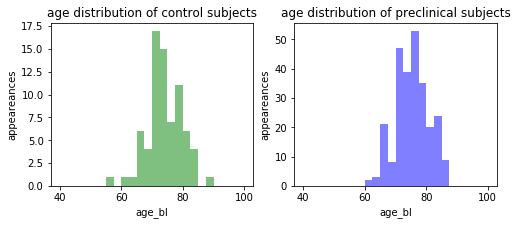

In [8]:
#age distribution histogram of control subjects
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
bins = np.linspace(40, 100, 25)
plt.hist(ages_control, bins, facecolor='green', alpha=0.5)
plt.xlabel('age_bl')
plt.ylabel('appeareances')
plt.title('age distribution of control subjects')
plt.subplot(1,2,2)
bins = np.linspace(40, 100, 25)
plt.hist(ages_preclinical, bins, facecolor='blue', alpha=0.5)
plt.xlabel('age_bl')
plt.ylabel('appeareances')
plt.title('age distribution of preclinical subjects')
plt.show()



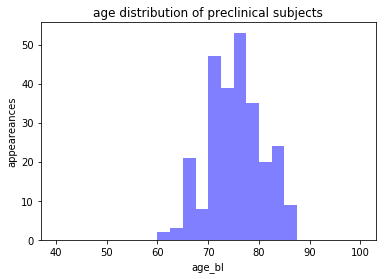

In [9]:
#age distribution of preclinical subjects (subjects with at least one preclinical event)
   
plt.figure(2)
bins = np.linspace(40, 100, 25)
plt.hist(ages_preclinical, bins, facecolor='blue', alpha=0.5)
plt.xlabel('age_bl')
plt.ylabel('appeareances')
plt.title('age distribution of preclinical subjects')
plt.show()

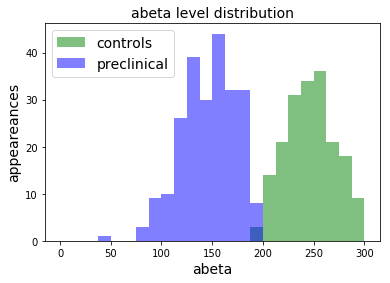

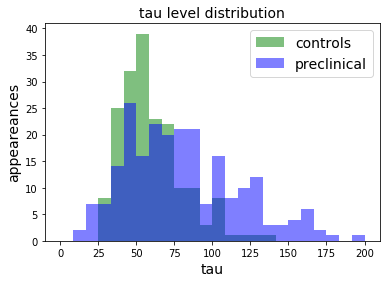

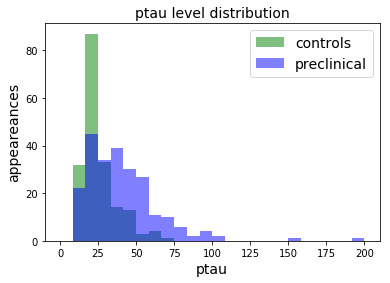

In [22]:
#plots of abeta, tau, ptau distributions
plt.figure(figsize=(12,18))
plt.figure(2)
bins = np.linspace(0, 300, 25)
plt.hist(abeta_control, bins, facecolor='green', alpha=0.5, label='controls')
plt.hist(abeta_preclinical, bins, facecolor='blue', alpha=0.5, label='preclinical')
plt.legend(loc='best', fontsize=14)
plt.xlabel('abeta', fontsize=14)
plt.ylabel('appeareances', fontsize=14)
plt.title('abeta level distribution', fontsize=14)

plt.show()

tau_preclinical = [x for x in tau_preclinical if x is not None] # remove subjects with no tau value
tau_control = [x for x in tau_control if x is not None]        

plt.figure(2)
bins = np.linspace(0, 200, 25)
plt.hist(tau_control, bins, facecolor='green', alpha=0.5, label='controls')
plt.hist(tau_preclinical, bins, facecolor='blue', alpha=0.5, label='preclinical')
plt.legend(loc='best', fontsize=14)
plt.xlabel('tau', fontsize=14)
plt.ylabel('appeareances', fontsize=14)
plt.title('tau level distribution', fontsize=14)

plt.show()

plt.figure(2)
bins = np.linspace(0, 200, 25)
plt.hist(ptau_control, bins, facecolor='green', alpha=0.5, label='controls')
plt.hist(ptau_preclinical, bins, facecolor='blue', alpha=0.5, label='preclinical')
plt.legend(loc='best', fontsize=14)
plt.xlabel('ptau', fontsize=14)
plt.ylabel('appeareances', fontsize=14)
plt.title('ptau level distribution', fontsize=14)

plt.show()

## plots of a preclinical and a control jacobian

In [23]:
import nibabel as nib

idx_s = np.random.randint(len(subjects_preclinical)) # choose a random subject from preclinical list
idx_s = subjects_preclinical[idx_s]
if len(Subjects[idx_s].jacobians) > 0:
    idx_j = np.random.randint(len(Subjects[idx_s].jacobians)) # choose a random jacobian of this subject
    path = Subjects[idx_s].jacobians[idx_j].jb # path to the file

  
img = nib.load(path)
data = img.get_data()
print(data.shape)
fig, axes = plt.subplots(1, 3)
plt.suptitle("slices of preclinical subject jacobian")
axes[0].imshow(data[60,:,:], cmap="gray", origin="lower")
axes[1].imshow(data[:,60,:], cmap="gray", origin="lower")
axes[2].imshow(data[:,:,60], cmap="gray", origin="lower")
plt.show()

NameError: name 'path' is not defined

In [24]:
idx_s = np.random.randint(len(subjects_control)) # choose a random position from control list
idx_s = subjects_control[idx_s]
idx_j = np.random.randint(len(Subjects[idx_s].jacobians)) # choose a random jacobian of this subject
path = Subjects[idx_s].jacobians[idx_j].jb # path to the file


img = nib.load(path)
data = img.get_data()
print(data.shape)
fig, axes = plt.subplots(1, 3)
plt.suptitle("slices of control subject ", Subjects[idx_s].rid, " jacobian")
axes[0].imshow(data[60,:,:], cmap="gray", origin="lower")
axes[1].imshow(data[:,60,:], cmap="gray", origin="lower")
axes[2].imshow(data[:,:,60], cmap="gray", origin="lower")
plt.show()

FileNotFoundError: No such file: '/home/miquel/ForMiquel/ADNI_longitudinal_proc_short/S4762_1/jd_S4762_r0_314311_t1_435761.nii'

In [26]:
y=np.load('/home/miquel/ForMiquel/CLEAN2/y.npy') #jacobian labels
dt=np.load('/home/miquel/ForMiquel/CLEAN2/dt.npy') #subject idxs

dt_n=[]
dt_p=[]

for i in range(0, len(dt)):
    if y[i] == 0:
        dt_n.append(dt[i])
    if y[i] == 1:
        dt_p.append(dt[i])   


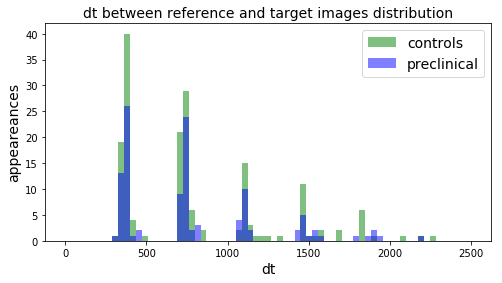

In [32]:
plt.figure(figsize=(8,4))
bins = np.linspace(0, 2500, 70)
plt.hist(dt_n, bins, facecolor='green', alpha=0.5, label='controls')
plt.hist(dt_p, bins, facecolor='blue', alpha=0.5, label='preclinical')
plt.legend(loc='best',  fontsize=14)
plt.xlabel('dt', fontsize=14)
plt.ylabel('appeareances',  fontsize=14)
plt.title('dt between reference and target images distribution',  fontsize=14)
plt.show()